# Project 2: Solving Quantum Systems Numerically

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Consider a time-dependent 1D quantum-mechanical system, consisting of a single particle initially well-localised in space. We can model this particle's wavefunction as a wavepacket (Gaussian).

$$ \Psi(z) = \frac{1}{\pi^{\frac{1}{4}}} e ^ {ia(z)} e ^ {\frac{-z^2}{2}}  $$

### We design an experiment to measure the position of this particle, which lies somewhere between $z_1$ and $z_2$. We are thus interested in integrating the square of the absolute value of the wavefunction, between these limits. 

$$|\Psi|^2 = \frac{1}{\sqrt{\pi}} e ^ {-z^2}$$





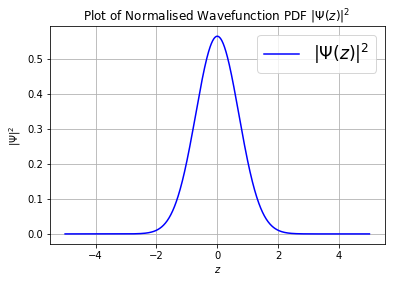

In [3]:
#First of all we create this psi squared function

def PsiSquared(z):
    
    psisquared = (1 / np.sqrt(np.pi)) * np.exp(-z*z)
    
    return psisquared

#We now want to plot this function, so we have to create a sample space:

space = np.linspace(-5,5,1000)

#Now plot psi squared:

plt.title("Plot of Normalised Wavefunction PDF $|\Psi (z)|^2$ ")
plt.plot(space, PsiSquared(space), color = 'blue', label = "$|\Psi (z) |^2$")
plt.xlabel("$z$")
plt.ylabel("$|\Psi|^2$")
plt.grid()
plt.legend(fontsize = 'xx-large')
#plt.savefig("WavefunctionGraph.pdf")


## 2 - Newton - Coates Integration

### Wrote a general routine to perform numerical integration of a user-supplied 1D function using the $extended$  $trapezoidal$ $rule$. Design your program so that it automatically refines the result to a user-specified relative accuracy $\epsilon.$ This means that you should design your function so that one of its arguments is a pointer to another function, which will be the integrand. This other function should take a single argument (the value of the integration variable) and return the value of the integrand at that value of the integration variable.

Text(0.5, 1.0, 'Plot of the Quadratic')

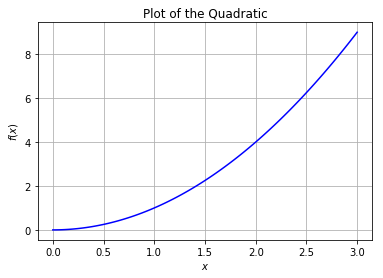

In [49]:
#Create a sample function to test the function that integrates, lets say a quadratic 

x = np.linspace(0,3,100)

def f(x):
    
    y = x*x
    
    return y

#Now let's plot this function to visualise it:

plt.plot(x,f(x), color = 'blue')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.title("Plot of the Quadratic")
#plt.savefig("TestCurveGraph.pdf")

In [50]:
#If we integrate this function between [0,10] then we should obtain 333.3

def trz_int(f,a,b,epsilon):
    """
    This function is meant to integrate f, where f is our function [a,b] are the limits.
    It should give the result to a user-specified relative accuracy of epsilon.
    It returns (I, Number of Evaluations) in this format.
    """ 
    #First define our first value of h, which will be halved with every iteration.
    h = b - a 
    I = (h/2) * (f(a) + f(b))     #First guess of I using trapezium rule
    
    accuracy = np.inf       #set initial accuracy value to be infinite to allow for first loop entry      
    
    h /= 2                  #Now we halve the value of h
    n = 1
    c = 1 
    while accuracy > epsilon:
        
        temp = 0 
        
        for i in range(0,n):
            c += 1
            temp += f(a + h + i * (2*h))    #Evaluate intermediate points 
            
        Ineo = I/2 + h*temp        #Our new estimation of the value of I
        
        accuracy = np.abs((Ineo - I) / I)
        I = Ineo
    
        n *= 2                   #Double the number of samples per iteration
        h /= 2                   #Halve the value of h 
        
        err = I * accuracy       #As we are limited to this precision
        N_eval = 2*n - 1         #Useful to know the total number of evaluations
        
    print("Total Number of Evaluations: " , N_eval)   
    print("The Integral between [a,b] is: ", I, "+/-", err)    
    return (I, err, epsilon, N_eval)
     

In [51]:
trz_int(f,0,10, 1E-6)

Total Number of Evaluations:  4095
The Integral between [a,b] is:  333.3333730697632 +/- 0.00011920924691823743


(333.3333730697632, 0.00011920924691823743, 1e-06, 4095)

### Implementing the Extended Trapezoidal Rule on our Wavefunction:

#### What we are basically doing here is calculating:
$$ P \equiv \int_a^b \! |\Psi(z)|^{2} \, \mathrm{d}z. $$

In [52]:
#We use z1 = a = 0 and z2 = b = 2, with an accuracy of 1E-6
trz_int(PsiSquared, 0, 2, 1E-6)

Total Number of Evaluations:  1023
The Integral between [a,b] is:  0.4976610799507482 +/- 1.576746299043355e-07


(0.4976610799507482, 1.576746299043355e-07, 1e-06, 1023)

### We can check this by integrating the normalised wavefunction of a larger region:

In [53]:
#This should come out to be 1
trz_int(PsiSquared, -5,5, 1E-6)

Total Number of Evaluations:  63
The Integral between [a,b] is:  0.9999999999973497 +/- 1.902478174961474e-11


(0.9999999999973497, 1.902478174961474e-11, 1e-06, 63)

##  Simpson's Rule

### Write another routine to do the same using the extended version of Simpson's Rule.

In [55]:
def Sim_Int(f,a,b,epsilon):
    
    """
    Numerical Integration of the function f between [a,b] with accuracy epsilon.
    The same principle as the previous routine.
    The function returns the value of the integral and the number of evaluations in the format (I, N_eval)
    """
    h = b - a 
    I = (h/2) * (f(a) + f(b)) 
    
    accuracy = np.inf            #Again set this to infinity to loop at least once 
    h /= 2                       #Halve the value of h     
    n = 1                        #No. of samples taken in every loop
    
    Simpson = I                  #Set Simpson as our initial guess from abobe to begin with
    c = 1
    while accuracy > epsilon:
        
        temp = 0         
        
        for i in range(0,n):
            c += 1
            temp += f(a + h + i * (2*h))    #Again taking all the point in between
            
        newI = I/2 + (h * temp)
        new_Simpson = (4/3) * newI - (1/3) * I     #As per the relation to Trapezium Rule
        accuracy = np.abs((new_Simpson - Simpson) / Simpson)
        Simpson = new_Simpson
        I = newI
        
        n *= 2       #Double the number of samples per iteration
        h /= 2       #Halve the value of h
        
        err = Simpson * accuracy       #As we are limited to this precision
        N_eval = 2*n - 1         #Useful to know the total number of evaluations
    
    print("Total Number of Evaluations: ", N_eval)
    print("The Integral between [a,b] is: ", Simpson, "+/-", err) 
    return (Simpson, err, epsilon, N_eval)
    

### We can test out Simpson Routine on the sample quadratic function:

In [56]:
Sim_Int(f, 0, 10, 1E-5)

Total Number of Evaluations:  7
The Integral between [a,b] is:  333.3333333333333 +/- 5.6843418860808e-14


(333.3333333333333, 5.6843418860808e-14, 1e-05, 7)

### Now we can implement Simpson Integration on our Wavefuntion $\Psi(z)$:

In [57]:
Sim_Int(PsiSquared, 0, 2, 1E-6)

Total Number of Evaluations:  127
The Integral between [a,b] is:  0.49766113031942405 +/- 3.285518696408377e-08


(0.49766113031942405, 3.285518696408377e-08, 1e-06, 127)

##### This can be tested using the Error Function, erf(x) which is defined as:

$$ erf(x) = \frac{1}{\sqrt{\pi}} \int_{-x}^{x} e^{t^{2}}dt $$

In [58]:
from scipy.special import erf

erf(2) / 2      #We halve as the interval is only half the one defined above. 

0.49766113250947636

## Monte Carlo Integration

### Write a MC Integration routine that can integrate a user-supplied function using importance sampling, and automatically refines its result to a user-specified relative accuracy $\epsilon$. Perform the integral twice more, this time using your Monte Carlo Integrator with:

### (a) A flat sampling pdf (No Importance Sampling)
### (b) A sampling pdf that drops off from a maximum at $x=0$ to a (non-zero) minimum at $x=2$

In [59]:
def Monte_Carlo_int(function, a, b, number , epsilon, Imp_Samp_func = None, Rejection = False):
    """
    Implementing Monte Carlo Integration on the function in [a,b] with relative accuracy epsilon.
    We take samples whilst the relative accuracy is larger than the value of epsilon.
    The "number" argument signified the number of times that we allow the accuracy to drop below epsion. 
    An importance sampling function can be user-supplied.
    The logic argument Rejection signifies which method (Transformation / Rejection) is implemented.
    """
    
    Q = function 
    listofQ = []                    #Create empty list to append all Q values later

    if Imp_Samp_func == None:       #Here we have NO Importance Sampling Function, thus = None
        
        print("Integrating without an Importance Sampling function")
        
        N = 1                       #This is the number of times we will sample the function        
        accuracy = np.inf           #set this as infinity for now so it always enters the while loop at least once
        count1 = 0                  #Create a counter to calculate the relative accuracy later on 
        x = np.random.uniform(a,b)  #Create random, uniformly spaced numbers between [a,b]
        avg = Q(x)                  #which is basically the function f(x) for an x between [a,b]
        Q_sum = Q(x)                #Create the sum which begins with the first value of Q(x)
                
        while count1 < number:      #As long as we fall less times that the number we wish to take
            
            N += 1                                      #increase the times that we sample by 1
            x = np.random.uniform(a,b)
            Q_temp = Q(x)                               #create random number again in [a,b]
            Q_sum += Q_temp                             #Basically doing the summation
            listofQ.append(Q_temp)                      #Append the i_th value of F to this list to be used later on
            new_avg = Q_sum / N                         #Define our new average depending on the number of samples taken
            accuracy = np.abs((new_avg - avg) / avg)    #Calculate the relative accuracy to compare with the precision 
            avg  = new_avg                              #re-define average value so it becomes the old in the new iteration
         
            if accuracy < epsilon:  #This part is also done throughout this routine, with the same principles applied
                count1 += 1         #track the number of times that the accuracy drops below epsion            
            else:
                count1 = 0          #as we consider consecutive times, reset the counter to zero if not less than epsilon
        
        I = np.abs(a-b) * avg       #Which is the volume (or in this 1D case the length) multiplied by the latest average value
        st_dev = np.std(listofQ)    #The standard deviation of all the values appended in the list of F 
    
    elif Rejection == True:          #Now considering the case that we use Importance Sampling with the Rejection method
        
        print("Importance Sampling with Rejection Method")
        P = Imp_Samp_func                 #This is just so that we avoid typing the whole of the argument name later on
        Comparison = Imp_Samp_func(0)     #This is our comparison function, the sampling function at the origin
        print("Comparison Function is y = ", Comparison)
        
        N = 0                       #This will represent the number of times
        avg = 1                     #So that it doesn't messes up the first time we calculate it. Later on it's redefined
        Q_sum = 0                   #set this to zero to begin with
        accuracy = np.inf           #Set this to infinity to allow for at least one iteration
        count2 = 0                  #Define a new count (same principle as above) and set it to zero to begin with
    
        while count2 < number:
            
            x_temp = np.random.uniform(a,b)              #Random number between the integration limits
            P_temp = np.random.uniform(0,Comparison)     #Random number below the comparison function
            
            if P(x_temp) > P_temp:                       #given that we are above the comparison function
                #print ("Accepted")      
                N += 1                                   
                Q_temp_unif = Q(x_temp) / P(x_temp)
                Q_sum += Q_temp_unif                
                listofQ.append(Q_temp_unif)
                
                new_avg = Q_sum / N
                accuracy = np.abs((new_avg - avg) / avg)
                avg = new_avg
                
                if accuracy < epsilon:     
                    count2 += 1
                else:
                    count2 = 0      #dealing with consecutive times therefore reset to zero is creterion not met  
                
        I = avg                     #The integral here is just the average value
        st_dev = np.std(listofQ)    
                                 
    else:        #Finally consider the case of Importance Sampling without the Rejection Method
        
        print ("Importance sampling with Transormation Method")
        N = 0
        accuracy = np.inf
        count3  = 0 
        uni = np.random.uniform(a,b)     
        x = Imp_Samp_func(uni)[0]      #The [0]th output is what we intend to take further 
        avg = 1
        Q_sum = Q(x)
        
        while count3 < number:      #where number is input by the user as an argument of the function
            
            N += 1 
            uni = np.random.uniform(0,1)
            x = Imp_Samp_func(uni)[0]
            Q_temp_unif = Q(x) / Imp_Samp_func(x)[1]    #[1]th output of Imp_Samp_func gives pdf(x)            
            Q_sum += Q_temp_unif
            listofQ.append(Q_temp_unif)
            
            new_avg = Q_sum / N
            accuracy = np.abs((new_avg - avg) / avg)
            avg  = new_avg
            
            if accuracy < epsilon:
                count3 +=1  
            else:
                count3 = 0
                            
        I = avg
        st_dev = np.std(listofQ)
        N = len(listofQ)          #The length of the whole list, which is the number of times it is sampled
            
    I_error = st_dev / np.sqrt(N)   #General formula for calculating the error
    
    #Print the output of the routine:
    print("Integral: ", I)
    print("Error in Intergral:", I_error )
    print("Number of Samples taken: ", N)
    
    #Useful to return the values as well in case they are to be used further:
    return (I, I_error, epsilon, N)
 

#### Testing the Routine without Importance Sampling;

In [60]:
Monte_Carlo_int(PsiSquared, 0, 2, 100000, 1.0E-4)

Integrating without an Importance Sampling function
Integral:  0.49615096485925864
Error in Intergral: 0.0005781185634636707
Number of Samples taken:  112829


(0.49615096485925864, 0.0005781185634636707, 0.0001, 112829)

#### Testing the Routine with Importance Sampling, with Rejection Method:

##### First define a linear transofmation function so that we can have an Importance Sampling function. We consider the pdf $$ pdf(x) = Ax + B $$ with $A = -0.48$ and $B = 0.98$. 

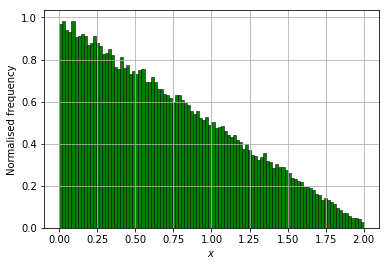

In [61]:
n_random = 100000
uni = np.random.uniform(0,1, n_random)     #This generates n_random random deviate numbers between the limits

def linear_transform(uni):
    """
    This function returns the inverted linear pdf (direct inversion), followed by the actual pdf in this format:
    returns: [F(x), pdf(x)]
    """
    A = -0.48
    B = 0.98
    
    result = (-B/A) - np.sqrt(np.abs((B/A)**2 + (2/A)*uni))
    
    return result, (A*uni + B)

#Can Plot a binned histogram to check that this works as expected:

test = linear_transform(uni)[0]

plt.hist(test, bins = 100, color = 'green', density = True, edgecolor = 'black', linewidth = 0.5)
#plt.title("Histogram to Verify Linear Transformation Routine")
plt.xlabel("$x$")
plt.ylabel("Normalised frequency")
plt.grid()
#plt.savefig("Binned_Histogram.pdf")
    

Define a routine that just outputs a straight line (for Importance Sampling evaluation):

In [62]:
def straight_line(x):
    """
    Just a function that outputs a straight line Ax + B given user-supplied A, B values. 
    """
    A = -0.48
    B = 0.98
    
    line_eqn = (A*x) + B
    
    return line_eqn

Can check that this works correctly by visualising a plot:

Text(0.5, 1.0, 'Just plotting the line')

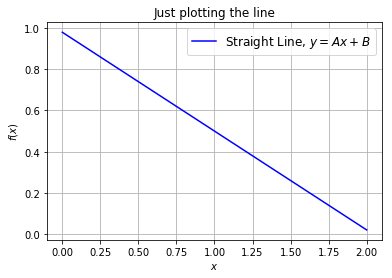

In [63]:
x = np.linspace(0,2,200)

plt.plot(x, straight_line(x), color = 'blue', label = "Straight Line, $y=Ax + B$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(fontsize = 'large')
plt.title("Just plotting the line")

Now Actually carry out the Integration:

In [64]:
Monte_Carlo_int(PsiSquared, 0, 2, 100, 1.0E-3, Imp_Samp_func = straight_line , Rejection = True)

Importance Sampling with Rejection Method
Comparison Function is y =  0.98
Integral:  0.4936097964256641
Error in Intergral: 0.005359778660264658
Number of Samples taken:  663


(0.4936097964256641, 0.005359778660264658, 0.001, 663)

#### Testing the Routine with Importance Sampling

In [65]:
Monte_Carlo_int(PsiSquared, 0, 2, 1000, 1.0E-3, Imp_Samp_func = linear_transform)

Importance sampling with Transormation Method
Integral:  0.49256788489456416
Error in Intergral: 0.003469552031874718
Number of Samples taken:  1592


(0.49256788489456416, 0.003469552031874718, 0.001, 1592)

## $$***ANALYSIS***$$

## The code is now ready. We are now in the position to start analysing these routines to produce results. 

### We firstly begin by analysing the $Extended$ $Trapezoidal$ $Rule$ and how it is affected by the value of  $\epsilon$.

#### Let's evaluate how the value of the Integral, the error and the number of evaluations required depend on the value of $\epsilon$.

Total Number of Evaluations:  31
The Integral between [a,b] is:  0.4976074524113482 +/- 0.00015940861741300805
Total Number of Evaluations:  63
The Integral between [a,b] is:  0.4976476862010165 +/- 4.0237042750300344e-05
Total Number of Evaluations:  255
The Integral between [a,b] is:  0.49766029160190767 +/- 2.522324869476058e-06
Total Number of Evaluations:  1023
The Integral between [a,b] is:  0.4976610799507482 +/- 1.576746299043355e-07
Total Number of Evaluations:  2047
The Integral between [a,b] is:  0.4976611193697696 +/- 3.9419024502706674e-08
Total Number of Evaluations:  8191
The Integral between [a,b] is:  0.49766113168824394 +/- 2.463695870631181e-09
Total Number of Evaluations:  32767
The Integral between [a,b] is:  0.4976611324581504 +/- 1.5398260449263517e-10
Total Number of Evaluations:  65535
The Integral between [a,b] is:  0.49766113249664534 +/- 3.849492946925939e-11
Total Number of Evaluations:  262143
The Integral between [a,b] is:  0.4976611325086773 +/- 2.407629

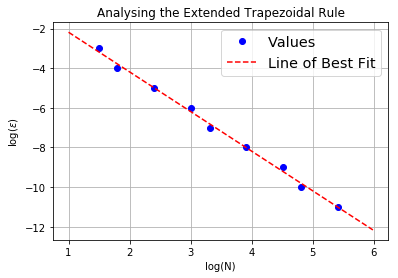

In [67]:
values = []            #Create empty list that is to be appended with all the values that we are interested in later

for power in range(3,12,1):                     #This allows for a quicker and easier analysis
    epsilon = 10 ** (-power)
    #print("Epsilon: ", epsilon)
    values.append(trz_int(PsiSquared, 0, 2, epsilon))
    

values2 = np.asarray(values)     #convert to np array for easier manipulation
epsilon = values2[:,2]           #store the column as the values of epsilon
number = values2[:,3]            #store the column as the values of N

def line(x,slope,intercept):     #This function is defined to allow for a line of best fit to be plotted
    eqn = x * slope + intercept
    return eqn

plt.plot(np.log10(number),np.log10(epsilon), 'o', color = 'blue', label = 'Values')
plt.grid()
plt.xlabel("log(N)")
plt.ylabel("log($\epsilon$)")

coeff, cov = curve_fit(line,np.log10(number),np.log10(epsilon))
slope = coeff[0]
slope_err = np.sqrt(cov[0,0])
intercept = coeff[1]

space = np.arange(1,6,0.01)
plt.plot(space, line(space,*coeff),"--",color = "red", label ="Line of Best Fit")
plt.legend(fontsize = 'x-large')
plt.title("Analysing the Extended Trapezoidal Rule")
#plt.savefig("Extended_Trapezoidal_Analysis.pdf")

# Let's see some results:
print("The Slope of the line is: ", slope, "+/-", slope_err)


We can see that the slope comes out to be -2, which is in perfect agreement with what we expect as the Trapezium Rule scales ~ $1/N^2$

### We can now analyse Simpson's Rule using the same principles.

Total Number of Evaluations:  15
The Integral between [a,b] is:  0.4976521729751664 +/- 0.00014282896219294778
Total Number of Evaluations:  31
The Integral between [a,b] is:  0.4976605716004128 +/- 8.398766985801869e-06
Total Number of Evaluations:  63
The Integral between [a,b] is:  0.49766109746423925 +/- 5.258643820936812e-07
Total Number of Evaluations:  127
The Integral between [a,b] is:  0.49766113031942405 +/- 3.285518696408377e-08
Total Number of Evaluations:  127
The Integral between [a,b] is:  0.49766113031942405 +/- 3.285518696408377e-08
Total Number of Evaluations:  255
The Integral between [a,b] is:  0.49766113237260284 +/- 2.0531788021191236e-09
Total Number of Evaluations:  511
The Integral between [a,b] is:  0.49766113250092175 +/- 1.2831891108544706e-10
Total Number of Evaluations:  1023
The Integral between [a,b] is:  0.4976611325089415 +/- 8.019751529660287e-12
Total Number of Evaluations:  2047
The Integral between [a,b] is:  0.4976611325094434 +/- 5.01876318282308

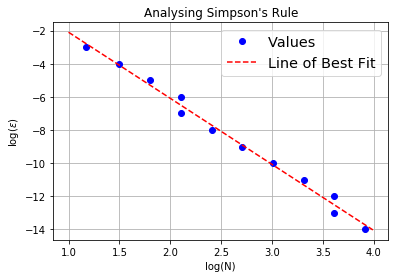

In [68]:
values = []            #Create empty list that is to be appended with all the values that we are interested in later

for power in range(3,15,1):                     #This allows for a quicker and easier analysis
    epsilon = 10 ** (-power)
    #print("Epsilon: ", epsilon)
    values.append(Sim_Int(PsiSquared, 0, 2, epsilon))
    
values2 = np.asarray(values)     #convert to np array for easier manipulation
epsilon = values2[:,2]           #store the column as the values of epsilon
number = values2[:,3]            #store the column as the values of N

def line(x,slope,intercept):     #This function is defined to allow for a line of best fit to be plotted
    eqn = x * slope + intercept
    return eqn

plt.plot(np.log10(number),np.log10(epsilon), 'o', color = 'blue', label = 'Values')
plt.grid()
plt.xlabel("log(N)")
plt.ylabel("log($\epsilon$)")

coeff, cov = curve_fit(line,np.log10(number),np.log10(epsilon))
slope = coeff[0]
slope_err = np.sqrt(cov[0,0])
intercept = coeff[1]

space = np.arange(1,4,0.01)
plt.plot(space, line(space,*coeff),"--",color = "red", label ="Line of Best Fit")
plt.legend(fontsize = 'x-large')
plt.title("Analysing Simpson's Rule")
#plt.savefig("Simpson_Rule_Analysis.pdf")

# Let's see some results:
print("The Slope of the line is: ", slope, "+/-", slope_err)


Ideally, we expect the value of the slope to be -4 as Simpson's Rule scales ~ $1/N^4$

### Now let's perform some Analysis on the Monte Carlo Integration Routine

The most obvious thing to do would be doing the same thing, that is investigating the relationship between $\epsilon$ and $N$ by plotting the graph. 

Let's begin by analysing the flat pdf case.

Integrating without an Importance Sampling function
Integral:  0.5012460919474774
Error in Intergral: 0.009791583915092161
Number of Samples taken:  390
Integrating without an Importance Sampling function
Integral:  0.5081200528033715
Error in Intergral: 0.004200873496941769
Number of Samples taken:  2147
Integrating without an Importance Sampling function
Integral:  0.5017029009557379
Error in Intergral: 0.0015075399051391759
Number of Samples taken:  16814
Integrating without an Importance Sampling function
Integral:  0.4942273419564001
Error in Intergral: 0.0010961778386084059
Number of Samples taken:  31599
Integrating without an Importance Sampling function
Integral:  0.49737251077098377
Error in Intergral: 0.00035166478266048965
Number of Samples taken:  305637
Integrating without an Importance Sampling function
Integral:  0.4977172702119879
Error in Intergral: 0.0001497782893110492
Number of Samples taken:  1685232
The Slope of the line is:  -1.388998554812027 +/- 0.074401566942

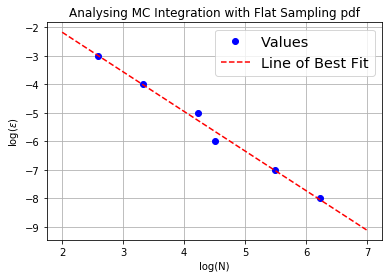

In [69]:
values = []            #Create empty list that is to be appended with all the values that we are interested in later

for power in range(3,9,1):                     #This allows for a quicker and easier analysis
    epsilon2 = 10 ** (-power)
    #print("Epsilon: ", epsilon)
    values.append(Monte_Carlo_int(PsiSquared,0,2,number = 3, epsilon = epsilon2, Imp_Samp_func = None, Rejection = False))
    
values2 = np.asarray(values)     #convert to np array for easier manipulation
epsilon = values2[:,2]           #store the column as the values of epsilon
number = values2[:,3]            #store the column as the values of N

def line(x,slope,intercept):     #This function is defined to allow for a line of best fit to be plotted
    eqn = x * slope + intercept
    return eqn

plt.plot(np.log10(number),np.log10(epsilon), 'o', color = 'blue', label = 'Values')
plt.grid()
plt.xlabel("log(N)")
plt.ylabel("log($\epsilon$)")

coeff, cov = curve_fit(line,np.log10(number),np.log10(epsilon))
slope = coeff[0]
slope_err = np.sqrt(cov[0,0])
intercept = coeff[1]

space = np.arange(2,7,0.01)
plt.plot(space, line(space,*coeff),"--",color = "red", label ="Line of Best Fit")
plt.legend(fontsize = 'x-large')
plt.title("Analysing MC Integration with Flat Sampling pdf")
#plt.savefig("MC_Flat_pdf_Analysis.pdf")

# Let's see some results:
print("The Slope of the line is: ", slope, "+/-", slope_err)

Moving on to analysing Monte Carlo Integration with Importance Sampling, we can define other importance sampling function that are to be used in the rejection method instead of using just a straight line, which was defined earlier in the $straight-line$ function. We can create a cosine and a quadratic function.

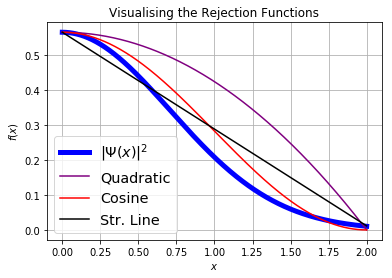

In [70]:
def quadratic(x): 
    eqn = (4 - x*x) * 0.1875
    return eqn

def cosine(x):    
    #eqn = (np.cos(np.pi * x/2)) + 1
    eqn = (np.cos(x * np.pi / 2) + 1) / 2
    return eqn

#Let's plot to see if they work ok, bearing in mind that we have to normalize them with the wavefunction pdf

norm_factor = PsiSquared(0)      #This is the normalization factor that will divide the functions above
x = np.linspace(0,2,1000)        #This is just the space over which we will plot, which is [a,b]

plt.plot(x, PsiSquared(x), color = 'blue', label = "$|\Psi(x)|^2$", linewidth = 5.0)
plt.plot(x, quadratic(x) * norm_factor / quadratic(0), color = 'purple', label = "Quadratic")
plt.plot(x, cosine(x) * norm_factor / cosine(0), color = 'red', label = "Cosine")
plt.plot(x, straight_line(x) * norm_factor / straight_line(0), color = 'black', label = "Str. Line")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Visualising the Rejection Functions")

plt.legend(fontsize = "x-large")
plt.grid()

#plt.savefig("Rejection_Functions_Visualisation.pdf")

Now let's implement these new Rejection methods: Linear, Quadratic, Cosine

In [71]:
print("*********Linear*********")
Monte_Carlo_int(PsiSquared, 0, 2, 100, 1.0E-6, Imp_Samp_func = straight_line , Rejection = True)
print("*********Quadratic*********")
Monte_Carlo_int(PsiSquared, 0, 2, 100, 1.0E-6, Imp_Samp_func = quadratic , Rejection = True)
print("*********Cosine*********")
Monte_Carlo_int(PsiSquared, 0, 2, 100, 1.0E-6, Imp_Samp_func = cosine , Rejection = True)

*********Linear*********
Importance Sampling with Rejection Method
Comparison Function is y =  0.98
Integral:  0.49772430988415584
Error in Intergral: 0.0001844732554275408
Number of Samples taken:  533165
*********Quadratic*********
Importance Sampling with Rejection Method
Comparison Function is y =  0.75
Integral:  0.4972332255295014
Error in Intergral: 0.00025017343456897284
Number of Samples taken:  651958
*********Cosine*********
Importance Sampling with Rejection Method
Comparison Function is y =  1.0
Integral:  0.49742084275780657
Error in Intergral: 0.0002107208138890459
Number of Samples taken:  197704


(0.49742084275780657, 0.0002107208138890459, 1e-06, 197704)

Finally, carry out some analysis for Monte Carlo Integration, using a Linear Transformation for Importance Sampling rather than the Rejection Method:

Importance sampling with Transormation Method
Integral:  0.49784629574189854
Error in Intergral: 0.0005356942506944301
Number of Samples taken:  63059
Importance sampling with Transormation Method
Integral:  0.49750304583121924
Error in Intergral: 0.0005388376348578545
Number of Samples taken:  62927
Importance sampling with Transormation Method
Integral:  0.49764261245394764
Error in Intergral: 0.0005371500496632051
Number of Samples taken:  63005
Importance sampling with Transormation Method
Integral:  0.49736932539555473
Error in Intergral: 0.0005383356920663566
Number of Samples taken:  63047
Importance sampling with Transormation Method
Integral:  0.4974414344228406
Error in Intergral: 0.0005371395938210234
Number of Samples taken:  62859
Importance sampling with Transormation Method
Integral:  0.49759090776113957
Error in Intergral: 0.0005374161335593276
Number of Samples taken:  62923
The Slope of the line is:  3.6216090087238276e-06 +/- 1.474384448215123e-07


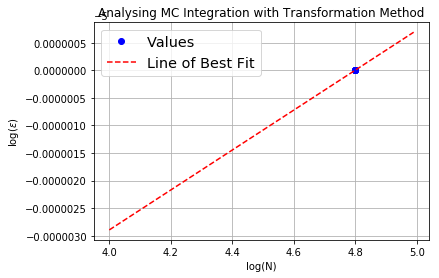

In [72]:
values = []            #Create empty list that is to be appended with all the values that we are interested in later

for power in range(3,9,1):                     #This allows for a quicker and easier analysis
    epsilon2 = 10 ** (-power)
    #print("Epsilon: ", epsilon)
    values.append(Monte_Carlo_int(PsiSquared, 0, 2, 1000, 1.0E-5, Imp_Samp_func = linear_transform))
    
values2 = np.asarray(values)     #convert to np array for easier manipulation
epsilon = values2[:,2]           #store the column as the values of epsilon
number = values2[:,3]            #store the column as the values of N

def line(x,slope,intercept):     #This function is defined to allow for a line of best fit to be plotted
    eqn = x * slope + intercept
    return eqn

plt.plot(np.log10(number),np.log10(epsilon), 'o', color = 'blue', label = 'Values')
plt.grid()
plt.xlabel("log(N)")
plt.ylabel("log($\epsilon$)")

coeff, cov = curve_fit(line,np.log10(number),np.log10(epsilon))
slope = coeff[0]
slope_err = np.sqrt(cov[0,0])
intercept = coeff[1]

space = np.arange(4,5,0.01)
plt.plot(space, line(space,*coeff),"--",color = "red", label ="Line of Best Fit")
plt.legend(fontsize = 'x-large')
plt.title("Analysing MC Integration with Transformation Method")
#plt.savefig("MC_Importance_Sampling_Transformation_Analysis.pdf")

# Let's see some results:
print("The Slope of the line is: ", slope, "+/-", slope_err)